## EY Interview Questions

Explain how Spark works internally ?
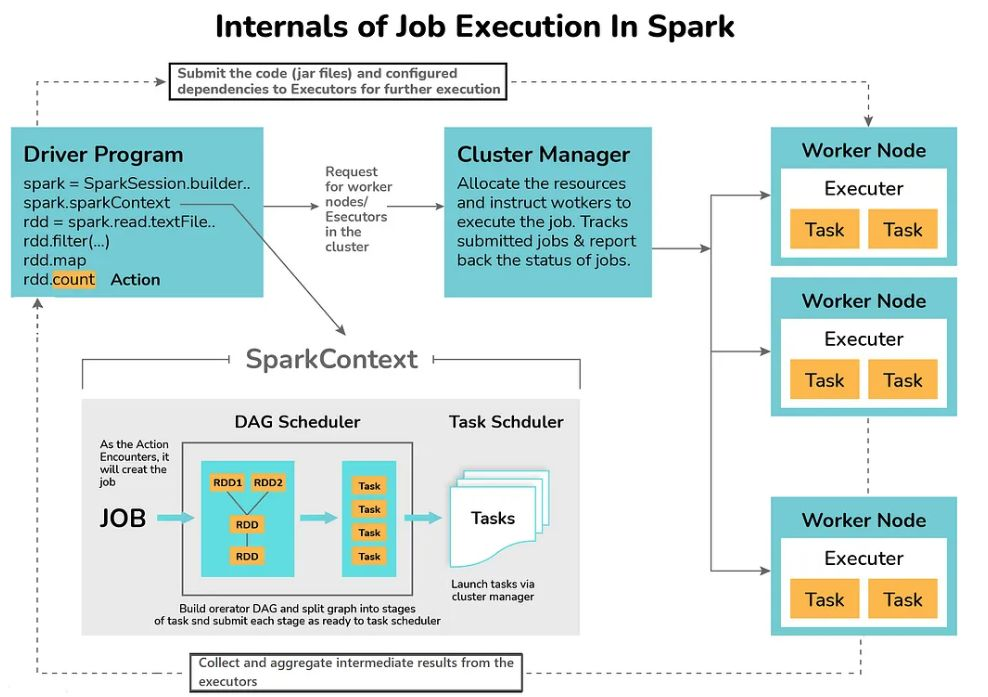

Apache Spark's architecture is designed to efficiently handle large-scale data processing through a master/worker pattern. Here's a concise overview of its internal workings and key components:

📌𝐌𝐚𝐬𝐭𝐞𝐫/𝐖𝐨𝐫𝐤𝐞𝐫 𝐏𝐚𝐭𝐭𝐞𝐫𝐧

Driver Program: Acts as the central coordinator, orchestrating task execution across a cluster of worker nodes. It communicates with the cluster manager to allocate resources and manage tasks.

Cluster Manager: Manages resources and schedules jobs. Spark supports various cluster managers, including YARN, Mesos, and its standalone mode.

📌𝐄𝐱𝐞𝐜𝐮𝐭𝐢𝐨𝐧 𝐅𝐥𝐨𝐰

**Job Submission**: A client application initiates a Spark job using the `spark-submit` command, which triggers the cluster manager to launch the driver.

**Code Compilation and SparkContext Creation**: The driver compiles the application code and dependencies, creating a `SparkContext` object. This object connects to the cluster manager and manages job execution.

**Job Division and DAG Creation**: The Spark application is divided into stages, and a Directed Acyclic Graph (DAG) is constructed. The DAG represents the logical execution plan, optimizing the sequence of transformations and actions.

**Task Scheduling**: The driver breaks down the DAG into tasks, each corresponding to an operation on a data subset. These tasks are submitted to the cluster manager for execution.

**Executor Allocation**: The cluster manager allocates resources to executors, which run tasks on worker nodes. Executors establish a direct connection with the driver.

**Task Execution**: Executors receive serialized tasks, deserialize them, and execute them on assigned data partitions. Tasks run in parallel across the cluster.

**Result Aggregation**: Executors produce intermediate results, which are combined and aggregated to generate the final output.

**Result Collection and Resource Release**: The driver collects and aggregates results, returning them to the application or storing them in the desired format. Once tasks are complete, resources are released.

📌𝐂𝐨𝐫𝐞 𝐀𝐛𝐬𝐭𝐫𝐚𝐜𝐭𝐢𝐨𝐧𝐬

**Resilient Distributed Dataset (RDD)**: An immutable collection of data partitioned across nodes, enabling efficient parallel processing without synchronization issues. RDDs are lazily evaluated, with transformations executed only when an action is called.

**Directed Acyclic Graph (DAG)**: Represents the logical execution plan, showing task dependencies. The DAG scheduler optimizes execution by breaking operations into stages and minimizing data shuffling.

📌𝐓𝐫𝐚𝐧𝐬𝐟𝐨𝐫𝐦𝐚𝐭𝐢𝐨𝐧𝐬 𝐚𝐧𝐝 𝐀𝐜𝐭𝐢𝐨𝐧𝐬

**Transformations**: Operations like map, filter, join, and groupBy that create new RDDs. They are lazily evaluated, defining the computation plan.

**Actions**: Operations like count, collect, save, and reduce that trigger computation and return results to the driver or write them to an output.

### 1. What is the purpose of checkpointing in Spark?
        
Checkpointing in Spark is a mechanism to provide fault tolerance and ensure data reliability. Here are the main purposes of checkpointing:

**Fault Tolerance**: Checkpointing helps recover from failures by saving the state of the computation to a reliable storage system. If a node fails, Spark can restart the computation from the last checkpoint rather than from the beginning.

**Breaking Lineage**: In Spark, transformations create a lineage of operations. Checkpointing breaks this lineage, which can help in reducing the complexity and memory usage of the Directed Acyclic Graph (DAG) of operations.

**Improving Performance**: By checkpointing intermediate results, Spark can avoid recomputing the entire lineage of transformations, which can significantly improve performance for iterative algorithms and long-running jobs.

**Simplifying Recovery**: Checkpointing simplifies the recovery process by providing a consistent state of the data, making it easier to restart and continue computations.


### 2. What will happen if your Spark job fails at 50% completion?

   If your Spark job fails at 50% completion, Spark's fault tolerance mechanisms will come into play. Here’s what typically happens:

**Task Re-execution**: Spark will attempt to re-execute the failed tasks. Since Spark jobs are divided into stages and tasks, only the tasks that failed will be retried, not the entire job.

**Checkpointing**: If you have enabled checkpointing, Spark will use the last checkpoint to restart the job from a known good state, reducing the amount of work that needs to be redone.

**Lineage Information**: Spark maintains lineage information, which allows it to recompute lost data. If a node fails, Spark can recompute the data using the lineage information from the remaining nodes.

**Speculative Execution**: Spark can also use speculative execution to run backup copies of slow tasks in parallel. If the original task fails, the backup task can take over, ensuring the job completes successfully.

**Error Handling**: Depending on your error handling strategy, you might have custom logic to handle failures, such as logging errors, sending alerts, or retrying the job with different parameters.

### 3. Can you explain the concept of dynamic partitioning?

  Dynamic partitioning in Spark is a feature that allows you to automatically create partitions based on the values of one or more columns in your data. This is particularly useful when dealing with large datasets, as it helps to distribute the data more evenly across the cluster, improving performance and scalability.

  Key Points of Dynamic Partitioning:
1. **Automatic Partition Creation**: Instead of manually specifying the partitions, Spark dynamically creates them based on the values in the specified columns.
2. **Improved Performance**: By distributing the data more evenly, dynamic partitioning can help to avoid data skew and improve the performance of your Spark jobs.
3. **Scalability**: It allows your Spark application to handle larger datasets more efficiently by leveraging the distributed nature of the cluster.
4. **Ease of Use**: Simplifies the process of partitioning data, as you don't need to predefine the partitions.



In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DynamicPartitioning").master("local[*]").getOrCreate()

schema = ("name string,joiningdate string,above18 string")

data = (
    ["abc","01-01-2024","yes"],
    ["def","02-01-2024","no"],
    ["ghi","03-01-2024","yes"])

df = spark.createDataFrame(data,schema)
df.show()
df.write.format("parquet").mode("Overwrite").partitionBy("joiningdate").save("D:\\Azure Data Engineer Resources\\Interview Questions\\output")
#df.write.mode("append").parquet("path/to/output")

+----+-----------+-------+
|name|joiningdate|above18|
+----+-----------+-------+
| abc| 01-01-2024|    yes|
| def| 02-01-2024|     no|
| ghi| 03-01-2024|    yes|
+----+-----------+-------+



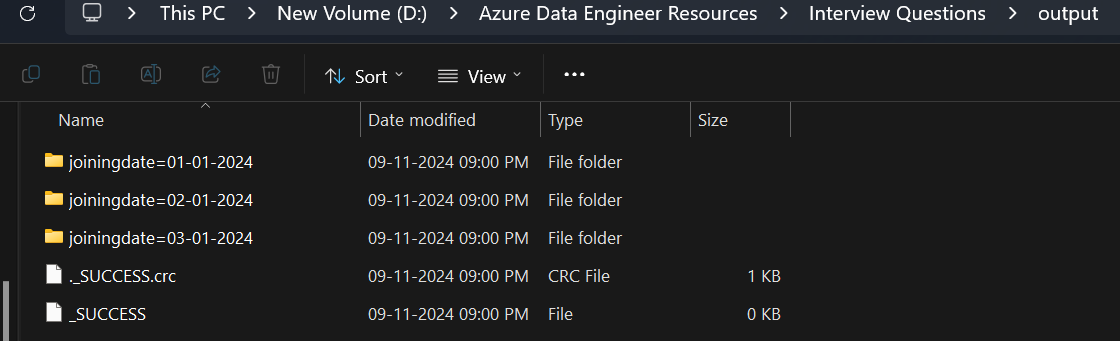

In this example, the data is dynamically partitioned by the "Date" column. Spark will automatically create partitions based on the unique values in the "Date" column.


### 4. How does Adaptive Query Execution (AQE) function in Spark?
   Adaptive Query Execution (AQE) in Spark is an optimization technique that dynamically adjusts query plans based on runtime statistics. This helps improve the performance and efficiency of Spark SQL queries. Here’s how AQE functions:

1. **Dynamic Optimization**: AQE reoptimizes query plans during execution by using runtime statistics. This means that Spark can make better decisions about how to execute the query based on the actual data being processed.

2. **Coalescing Shuffle Partitions**: AQE can dynamically adjust the number of shuffle partitions based on the size of the data. This helps in reducing the overhead of managing too many small partitions or too few large partitions.

3. **Handling Skewed Data**: AQE can detect and handle skewed data by splitting skewed partitions into smaller ones. This ensures that no single partition becomes a bottleneck.

4. **Join Optimization**: AQE can optimize join operations by dynamically choosing the best join strategy (e.g., broadcast join vs. sort-merge join) based on the size of the data being joined.

5. **Enabling AQE**: AQE can be enabled by setting the configuration `spark.sql.adaptive.enabled` to `true`. This allows Spark to apply AQE optimizations to eligible queries.


### 5. What distinguishes MapReduce from Spark programming?

   MapReduce and Spark are both powerful frameworks for processing large-scale data, but they have some key differences:

1. **Programming Model**
        - **MapReduce**: Uses a low-level programming model with two main functions: `map` and `reduce`. It requires more lines of code and manual handling of intermediate data.
        - **Spark**: Provides a high-level API with various operators like `map`, `reduce`, `filter`, `join`, and more. It supports multiple languages (Scala, Java, Python, R) and is more user-friendly.

2. **Performance**
        - **MapReduce**: Writes intermediate data to disk between each stage, which can lead to higher latency and slower performance.
        - **Spark**: Keeps intermediate data in memory, which significantly improves performance and reduces latency.

3. **Ease of Use**
        - **MapReduce**: Requires more boilerplate code and manual optimization. It can be more complex and time-consuming to develop and debug.
        - **Spark**: Offers a more concise and expressive API, making it easier to write, read, and maintain code.

4. **Fault Tolerance**
        - **MapReduce**: Achieves fault tolerance by writing intermediate data to disk, which can be recomputed if a node fails.
        - **Spark**: Uses lineage information to recompute lost data. It can also use checkpointing for additional fault tolerance.

5. **Advanced Analytics**
        - **MapReduce**: Primarily designed for batch processing and does not natively support advanced analytics like machine learning or graph processing.
        - **Spark**: Includes built-in libraries for machine learning (MLlib), graph processing (GraphX), and stream processing (Spark Streaming).

6. **Data Processing**
       - **MapReduce**: Best suited for batch processing of large datasets.
       - **Spark**: Supports both batch and real-time stream processing, making it more versatile.

7. **Community and Ecosystem**
        - **MapReduce**: Has been around longer and has a mature ecosystem, but its usage is declining in favor of more modern frameworks.
        - **Spark**: Has a rapidly growing community and ecosystem, with strong support from major cloud providers and data platforms.

In summary, while MapReduce is a robust framework for batch processing, Spark offers a more flexible, efficient, and user-friendly approach to big data processing, with additional support for real-time analytics and advanced data processing tasks.


### 6. What is a serializer in the context of Spark?

   In the context of Spark, a serializer is a component that converts objects into a format that can be easily stored or transmitted and then reconstructs them back into their original form. Serialization is crucial for the performance of Spark applications because it affects how data is transferred between nodes in a cluster and how it is stored in memory.

 Key Points about Serializers in Spark:
1. **Data Transfer**: Serializers are used to convert data into a byte stream that can be efficiently transferred over the network between different nodes in a Spark cluster.
2. **Memory Efficiency**: Efficient serialization reduces the memory footprint of objects, allowing Spark to store more data in memory and reduce the need for disk I/O.
3. **Performance**: The choice of serializer can significantly impact the performance of Spark applications. Faster serializers can reduce the time spent on serialization and deserialization, leading to quicker job execution.

 Types of Serializers in Spark:
1. **Java Serialization**: The default serializer in Spark, which uses Java's built-in serialization mechanism. It is easy to use but can be slower and more memory-intensive.
2. **Kryo Serialization**: A more efficient alternative to Java serialization. Kryo is faster and produces smaller serialized representations, making it a better choice for performance-critical applications.

 Example Configuration:
To use Kryo serialization in Spark, you can set the following configuration properties:


In [2]:
# from pyspark import SparkConf,SparkContext

# conf = SparkConf().setAppName("ex")
# conf.set("spark.serializer","org.apache.spark.serializer.KyroSerializer")
# sc = SparkContext(conf = conf)

### 7. What type of index have you implemented in a fact table?

In a fact table, the type of index implemented can vary based on the specific requirements and the database system being used. However, some common types of indexes used in fact tables include:

1. **Clustered Index**: This type of index sorts and stores the data rows in the table based on the key values. It can improve the performance of queries that retrieve a range of values.In MySQL, the primary key creates a clustered index by default. This sorts and stores the data rows in the table based on the key values.

2. **Non-Clustered Index**: This type of index creates a separate structure from the data rows, with pointers back to the original data. It is useful for improving the performance of queries that do not retrieve a range of values.

3. **Bitmap Index**: This type of index is particularly useful in data warehousing environments where the fact table is very large and the columns have a low cardinality (few unique values). It uses bitmaps to represent the presence or absence of a value.

4. **Composite Index**: This type of index includes multiple columns in the index key. It can improve the performance of queries that filter on multiple columns.

5. **Covering Index**: This type of index includes all the columns needed by a query, so the query can be satisfied entirely by the index without accessing the table data.



### 8. How to find the smallest number in a list using Python?


In [3]:
myList = [10,3,5,6,2,11,24,22,1]

def find_smallest(nums):
    small = nums[0]
    for num in nums:
        if num < small:
            small = num
    return small

def using_min(nums):
    small = min(nums)
    return small

find_smallest(myList)
using_min(myList)

1

### 9. What are the various read and write modes available in Spark?

   In Spark, there are several read and write modes that you can use to control how data is read from and written to various data sources. Here are the details:

Read Modes
1. **PERMISSIVE** (default): When Spark encounters a corrupt record, it sets all column values to `null` and places the malformed row's values in a string column called `_corrupt_record`.
Read the CSV file with PERMISSIVE mode
`
df = spark.read.option("mode", "PERMISSIVE").option("header", "true").csv("sample.csv")
df.show()
`
3. **DROPMALFORMED**: This mode removes malformed records and only loads the healthy ones.`df = spark.read.option("mode", "DROPMALFORMED").option("header", "true").csv("sample.csv") df.show()`
4. **FAILFAST**: This mode raises an exception and terminates the job immediately when a corrupt record is encountered.`df = spark.read.option("mode", "FAILFAST").option("header", "true").csv("sample.csv") df.show()`

Write Modes
1. **append**: Adds the contents of the DataFrame to existing data.`df.write.mode("append").parquet("path/to/output")`
2. **overwrite**: Overwrites existing data. If the data already exists, it will be replaced.`df.write.mode("overwrite").parquet("path/to/output")`
3. **error** or **errorifexists**: Throws an exception if data already exists. This is the default mode.`df.write.mode("error").parquet("path/to/output")`
4. **ignore**: Silently ignores the write operation if data already exists.
`df.write.mode("ignore").parquet("path/to/output")`

In [1]:
#Read Modes

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

sc = SparkSession.builder.appName("ReadingModes").master("local[*]").getOrCreate()

schema = StructType([
    StructField("Name",StringType(),True),
    StructField("age",IntegerType()),
    StructField("place",StringType(),True)])
Data =(
    ["abc",23,"london"],
    ["abc",23,"london"],
    ["abc",0,"london"])
df = sc.createDataFrame(Data,schema)
df.show()

+----+---+------+
|Name|age| place|
+----+---+------+
| abc| 23|london|
| abc| 23|london|
| abc|  0|london|
+----+---+------+



### 10. Can you describe the ACID properties in a database?

Absolutely! The ACID properties are a set of principles that ensure reliable processing of database transactions. They stand for Atomicity, Consistency, Isolation, and Durability. Here's a breakdown:
1. Atomicity
   - **Definition**: Ensures that each transaction is treated as a single unit, which either completely succeeds or completely fails.
    - **Example**: If a transaction involves transferring money from one bank account to another, atomicity ensures that either both the debit and credit operations are completed, or neither is.
        
2. Consistency
   - **Definition**: Ensures that a transaction brings the database from one valid state to another, maintaining database invariants.
    - **Example**: If a database rule states that account balances cannot be negative, consistency ensures that this rule is upheld after any transaction.

3. Isolation
   - **Definition**: Ensures that transactions are executed in isolation from one another, preventing concurrent transactions from interfering with each other.
    - **Example**: If two transactions are trying to update the same account balance simultaneously, isolation ensures that the final balance reflects both updates correctly.

4. Durability
   - **Definition**: Ensures that once a transaction is committed, it remains so, even in the event of a system failure.
    - **Example**: After a transaction to transfer money is completed and committed, the changes to the account balances are permanently recorded, even if the system crashes immediately afterward.

These properties are crucial for maintaining the integrity and reliability of a database system.

### 11. What is the difference between the `head()` and `take()` methods in the Spark DataFrame API?
The `head()` and `take()` methods in the Spark DataFrame API are used to retrieve rows from a DataFrame, but they have some differences in their usage and behavior:

    `head()`
- **Purpose**: Returns the first row or the first `n` rows of the DataFrame.
- **Return Type**: If no argument is provided, it returns a single row as a `Row` object. If an integer `n` is provided, it returns a list of `Row` objects.
- **Usage**:
  ```python
  # Returns the first row
  first_row = df.head()
  
  # Returns the first 5 rows
  first_5_rows = df.head(5)
  ```

 `take()`
- **Purpose**: Returns the first `n` rows of the DataFrame.
- **Return Type**: Always returns a list of `Row` objects, even if `n` is 1.
- **Usage**:
  ```python
  # Returns the first 5 rows
  first_5_rows = df.take(5)
  ```

Key Differences
1. **Return Type**:
   - `head()`: Returns a single `Row` object if no argument is provided, or a list of `Row` objects if an integer `n` is provided.
   - `take()`: Always returns a list of `Row` objects.

2. **Behavior**:
   - `head()`: Can be used to retrieve a single row or multiple rows.
   - `take()`: Specifically used to retrieve multiple rows.

In summary, use `head()` when you need the first row or a specific number of rows, and use `take()` when you need a specific number of rows and prefer a consistent return type (a list of `Row` objects).

### 12. How would you design a process for injecting data into a fact table?

Designing a process for injecting data into a fact table involves several steps to ensure data integrity, performance, and scalability. Here’s a high-level overview of the process:

1. Data Extraction
- **Source Identification**: Identify the source systems from which data will be extracted (e.g., transactional databases, flat files, APIs).
- **Data Extraction**: Use ETL (Extract, Transform, Load) tools or custom scripts to extract data from the source systems.

2. Data Transformation
- **Data Cleaning**: Remove duplicates, handle missing values, and correct data inconsistencies.
- **Data Enrichment**: Add additional information or derive new columns if necessary.
- **Data Validation**: Ensure the data meets the required quality standards and business rules.

3. Data Loading
- **Staging Area**: Load the cleaned and transformed data into a staging area. This is a temporary storage area used for further processing.
- **Data Partitioning**: Partition the data based on relevant columns (e.g., date, region) to improve query performance.
- **Indexing**: Create appropriate indexes on the fact table to speed up data retrieval.

4. Data Injection into Fact Table
- **Batch Processing**: Load data in batches to manage large volumes of data efficiently.
- **Incremental Loading**: Use incremental loading techniques to only load new or changed data, reducing the load on the system.
- **Error Handling**: Implement error handling mechanisms to capture and log any issues during the data load process.

5. Post-Load Processing
- **Data Validation**: Validate the data in the fact table to ensure it has been loaded correctly.
- **Performance Tuning**: Optimize the fact table by updating statistics, rebuilding indexes, and performing other tuning activities.
- **Backup**: Create backups of the fact table to ensure data recovery in case of failures.


In [5]:
from pyspark.sql import SparkSession

fact_spark = SparkSession.builder.appName("Facttablecreation").master("local[*]").getOrCreate()
schema_ = ("name string,age string,salary string,phone string")

data1 = (
    ["abc","23","23000","923232242"],
    ["0","24","23050","923232232"]
)
    
df = fact_spark.createDataFrame(data1,schema_)
df.show()

+----+---+------+---------+
|name|age|salary|    phone|
+----+---+------+---------+
| abc| 23| 23000|923232242|
|   0| 24| 23050|923232232|
+----+---+------+---------+



### 11. What's the difference between bucketing and partitioning in Spark? 

Bucketing and partitioning are both techniques used in Spark to optimize data processing, but they serve different purposes and have distinct characteristics:

Partitioning
- **Purpose**: Partitioning divides the data into separate, smaller chunks based on the values of one or more columns. This helps in distributing the data across the cluster and improves query performance by allowing Spark to read only the relevant partitions.
- **How It Works**: When you partition a DataFrame, Spark creates a directory for each unique value of the partition column(s). Each directory contains the data for that partition.
- **Use Case**: Partitioning is useful when you frequently filter or query data based on the partition column(s). For example, partitioning by date can speed up queries that filter by specific dates or date ranges.

Bucketing
- **Purpose**: Bucketing distributes data into a fixed number of buckets based on the hash of a column's value. This helps in optimizing join operations and aggregations by ensuring that the data with the same bucket value is colocated.
- **How It Works**: When you bucket a DataFrame, Spark creates a fixed number of files (buckets) for each bucketed column. Each file contains the data for that bucket.
- **Use Case**: Bucketing is useful when you need to perform frequent joins or aggregations on a specific column. For example, bucketing by user ID can optimize joins between user data and transaction data.

Key Differences
1. **Granularity**:
   - Partitioning: Divides data into directories based on unique values of the partition column(s).
   - Bucketing: Divides data into a fixed number of files based on the hash of the bucket column's value.

2. **Flexibility**:
   - Partitioning: More flexible as it creates partitions dynamically based on the data.
   - Bucketing: Less flexible as it requires specifying the number of buckets upfront.

3. **Optimization**:
   - Partitioning: Optimizes data retrieval by allowing Spark to read only the relevant partitions.
   - Bucketing: Optimizes join operations and aggregations by colocating data with the same bucket value.

In summary, partitioning is ideal for optimizing data retrieval based on specific columns, while bucketing is best for optimizing joins and aggregations on specific columns.

In [6]:
#PartitionBy
df.write.format("parquet").partitionBy("age").mode("overwrite").save("/path/output")
#bucketby
df.write.format("parquet").mode("overwrite").bucketBy(10,"age").sortBy("age").saveAsTable("Buckettable")

SparkRuntimeException: [LOCATION_ALREADY_EXISTS] Cannot name the managed table as `spark_catalog`.`default`.`buckettable`, as its associated location 'file:/C:/Users/Asus/spark-warehouse/buckettable' already exists. Please pick a different table name, or remove the existing location first.

In [ ]:
spark.sql("select * from Buckettable").show()

In [ ]:
spark.sql("ANALYZE TABLE Buckettable COMPUTE STATISTICS")

### 12. How does partitioning improve performance in PySpark? 

Partitioning in PySpark improves performance in several ways:

1. **Efficient Data Retrieval**
Partitioning divides the data into smaller, manageable chunks based on the values of one or more columns. This allows Spark to read only the relevant partitions when executing queries, reducing the amount of data scanned and improving query performance.

2. **Parallel Processing**
Partitioning enables parallel processing by distributing the data across multiple nodes in the cluster. Each node can process its partition independently, leading to faster data processing and better utilization of cluster resources.

3. **Reduced Shuffling**
Partitioning helps minimize data shuffling during operations like joins and aggregations. When data is partitioned on the join key or aggregation key, Spark can perform these operations more efficiently by avoiding unnecessary data movement between nodes.

4. **Improved Caching**
When data is partitioned, Spark can cache partitions independently. This means that frequently accessed partitions can be kept in memory, reducing the need to read from disk and speeding up subsequent queries.


### 13. What is a broadcast join, and when should you use it?
A broadcast join in Spark is a type of join operation where one of the DataFrames (usually the smaller one) is broadcasted to all the worker nodes. This allows the join to be performed locally on each node without the need for shuffling large amounts of data across the network.

When to Use a Broadcast Join
1. **Small Table**: When one of the tables being joined is small enough to fit into the memory of each worker node. This minimizes the data movement and speeds up the join operation.
2. **Skewed Data**: When the data is skewed, meaning some keys have significantly more records than others. Broadcasting the smaller table can help balance the load and improve performance.
3. **Performance Optimization**: When you want to optimize the performance of your join operation by reducing the amount of data shuffled across the network.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

brodcast_spark = SparkSession.builder.appName("BroadcastJoin").master("local[*]").getOrCreate()

data1 = (["ABC","23"],["DEF","24"],["GHI","25"])
data2 = (["ABC","Bangalore"],["DEF","chennai"],["GHI","Madurai"])

df1 = brodcast_spark.createDataFrame(data1,["Name","Age"])
df2 = brodcast_spark.createDataFrame(data2,["Name","Location"])

df3 = df1.join(broadcast(df2),"Name")
df3.show()
df3.rdd.getNumPartitions()

### 4. How do coalesce and repartition handle data differently?
`coalesce` and `repartition` are both used to change the number of partitions in a DataFrame, but they handle data differently and are used in different scenarios:

Coalesce
- **Purpose**: Reduces the number of partitions in a DataFrame.
- **How It Works**: Coalesce merges existing partitions to reduce the number of partitions without performing a full shuffle of the data. It is more efficient than `repartition` when decreasing the number of partitions.
- **Use Case**: Use `coalesce` when you want to reduce the number of partitions, especially after a narrow transformation like `filter` or `map`, where the data is already somewhat partitioned.

```python
# Example of coalesce
df = df.coalesce(2)
```

Repartition
- **Purpose**: Changes the number of partitions in a DataFrame, either increasing or decreasing.
- **How It Works**: Repartition performs a full shuffle of the data, redistributing it across the specified number of partitions. This ensures an even distribution of data across all partitions.
- **Use Case**: Use `repartition` when you need to increase the number of partitions or when you need a more balanced distribution of data across partitions, especially after wide transformations like `join` or `groupBy`.

```python
# Example of repartition
df = df.repartition(4)
```

Key Differences
1. **Efficiency**:
   - `coalesce`: More efficient for reducing the number of partitions as it avoids a full shuffle.
   - `repartition`: Less efficient due to the full shuffle but ensures an even distribution of data.

2. **Use Cases**:
   - `coalesce`: Best for reducing partitions after narrow transformations.
   - `repartition`: Best for increasing partitions or balancing data after wide transformations.

In summary, use `coalesce` when you want to reduce the number of partitions efficiently, and use `repartition` when you need to change the number of partitions and ensure an even distribution of data.

In [ ]:
SparkSession.getActiveSession()

### 6. DynamicFrame vs. DataFrame—what's the big difference? 

DynamicFrame and DataFrame are both data structures used in Spark, but they have some key differences, especially in the context of AWS Glue.

DataFrame
- **Schema Requirement**: Requires a predefined schema or infers the schema from the data. This can be limiting when dealing with semi-structured or unstructured data.
- **Usage**: Widely used for data processing and analysis in Spark. Supports functional-style operations (map, reduce, filter) and SQL operations (select, project, aggregate).
- **Performance**: Optimized for performance with various built-in optimizations like Catalyst optimizer and Tungsten execution engine.

DynamicFrame
- **Schema Flexibility**: Does not require a predefined schema. Each record is self-describing, and AWS Glue computes the schema on-the-fly when required. This makes it more adaptable to schema changes and inconsistencies.
- **Usage**: Specifically designed for ETL (Extract, Transform, Load) operations in AWS Glue. It can handle semi-structured and unstructured data more gracefully.
- **Schema Inconsistencies**: Explicitly encodes schema inconsistencies using a choice (or union) type, allowing for more flexible data processing.

Key Differences
1. **Schema Management**:
   - **DataFrame**: Requires a fixed schema, which can be inferred or predefined.
   - **DynamicFrame**: Schema is computed on-the-fly, making it more flexible for handling evolving data structures.

2. **ETL Operations**:
   - **DataFrame**: Suitable for general data processing and analysis.
   - **DynamicFrame**: Tailored for ETL operations, especially in AWS Glue, with built-in support for handling schema inconsistencies and semi-structured data.

3. **Conversion**:
   - You can convert between DynamicFrame and DataFrame as needed. For example, you might use a DynamicFrame for initial data processing and then convert it to a DataFrame for more complex transformations or analysis.

Example Conversion
Here's how you can convert a DataFrame to a DynamicFrame and vice versa in AWS Glue:

```python
from awsglue.context import GlueContext
from pyspark.context import SparkContext
from awsglue.dynamicframe import DynamicFrame

# Initialize Glue context
glueContext = GlueContext(SparkContext.getOrCreate())

# Convert DataFrame to DynamicFrame
dynamic_frame = DynamicFrame.fromDF(dataframe, glueContext, "dynamic_frame")

# Convert DynamicFrame to DataFrame
dataframe = dynamic_frame.toDF()
```

In summary, while DataFrames are powerful and widely used in Spark for data processing, DynamicFrames offer additional flexibility and capabilities for ETL operations, particularly in AWS Glue.


### 7. How can you optimize join operations for large datasets? 

Optimizing join operations for large datasets in Spark involves several strategies to improve performance and reduce resource consumption. Here are some key techniques:

1. Broadcast Join
- **When to Use**: When one of the tables is small enough to fit into the memory of each worker node.
- **How It Works**: The smaller table is broadcasted to all worker nodes, allowing the join to be performed locally on each node.
- **Example**:
  ```python
  from pyspark.sql.functions import broadcast

  small_df = spark.read.csv("path/to/small_table.csv")
  large_df = spark.read.csv("path/to/large_table.csv")

  result = large_df.join(broadcast(small_df), "join_column")
  result.show()
  ```

2. Partitioning
- **When to Use**: When the data is large and can be partitioned based on the join key.
- **How It Works**: Partitioning the data on the join key ensures that the data is colocated, reducing shuffling.
- **Example**:
  ```python
  large_df = large_df.repartition("join_column")
  result = large_df.join(small_df, "join_column")
  result.show()
  ```

3. Bucketing
- **When to Use**: When you need to perform frequent joins on a specific column.
- **How It Works**: Bucketing distributes data into a fixed number of buckets based on the hash of the join column, ensuring that data with the same bucket value is colocated.
- **Example**:
  ```python
  large_df.write.bucketBy(10, "join_column").sortBy("join_column").saveAsTable("bucketed_table")
  small_df.write.bucketBy(10, "join_column").sortBy("join_column").saveAsTable("bucketed_small_table")

  large_df = spark.table("bucketed_table")
  small_df = spark.table("bucketed_small_table")

  result = large_df.join(small_df, "join_column")
  result.show()
  ```

4. Skewed Data Handling
- **When to Use**: When the data is skewed, meaning some keys have significantly more records than others.
- **How It Works**: Use techniques like salting to distribute the skewed keys more evenly across partitions.
- **Example**:
  ```python
  from pyspark.sql.functions import col, concat, lit

  # Add a salt column to the skewed table
  skewed_df = skewed_df.withColumn("salt", (col("join_column") % 10).cast("string"))
  skewed_df = skewed_df.withColumn("join_column_salted", concat(col("join_column"), col("salt")))

  # Add a salt column to the other table
  other_df = other_df.withColumn("salt", lit("0"))
  other_df = other_df.withColumn("join_column_salted", concat(col("join_column"), col("salt")))

  result = skewed_df.join(other_df, "join_column_salted")
  result.show()
  ```

5. Caching
- **When to Use**: When the same join operation is performed multiple times.
- **How It Works**: Cache the DataFrame to avoid recomputing it for each join operation.
- **Example**:
  ```python
  large_df.cache()
  result = large_df.join(small_df, "join_column")
  result.show()
  ```

These techniques can help optimize join operations for large datasets in Spark, improving performance and reducing resource consumption.

### 8. What's the difference between wide and narrow transformations
In Spark, transformations are operations that create a new DataFrame or RDD from an existing one. They are classified into two types: narrow transformations and wide transformations. Here's a breakdown of the differences:

Narrow Transformations
- **Definition**: Narrow transformations are those where each input partition contributes to only one output partition. There is no need for data to be shuffled across the network.
- **Examples**: `map()`, `filter()`, `flatMap()`, `mapPartitions()`
- **Characteristics**:
  - **Efficiency**: More efficient because they do not require data shuffling.
  - **Execution**: Can be executed in a single stage.
  - **Use Case**: Suitable for operations that can be performed independently on each partition.

Wide Transformations
- **Definition**: Wide transformations are those where each input partition contributes to multiple output partitions. This requires data to be shuffled across the network.
- **Examples**: `reduceByKey()`, `groupByKey()`, `join()`, `distinct()`
- **Characteristics**:
  - **Efficiency**: Less efficient due to the need for data shuffling.
  - **Execution**: Requires multiple stages to execute.
  - **Use Case**: Suitable for operations that require data from multiple partitions to be combined or aggregated.

In the `map()` example, each element is transformed independently, making it a narrow transformation. In the `reduceByKey()` example, elements with the same key are combined, requiring data to be shuffled across partitions, making it a wide transformation.

Understanding the difference between narrow and wide transformations is crucial for optimizing Spark jobs and improving performance. Let me know if you need more details or have any other questions!

### 9. How does speculative execution work in Spark?
Speculative execution in Spark is a mechanism designed to handle straggler tasks—tasks that are running significantly slower than others. This feature helps improve the overall performance and reliability of Spark jobs by mitigating the impact of these slow tasks. Here's how it works:

#### How Speculative Execution Works
1. **Detection of Slow Tasks**: Spark continuously monitors the progress of tasks within a stage. If it detects that a task is running slower than the median task completion time for that stage, it marks the task as a potential straggler.
2. **Launching Speculative Tasks**: Once a task is identified as a straggler, Spark launches a speculative copy of the task on another node. This speculative task runs in parallel with the original task.
3. **Task Completion**: The first task (either the original or the speculative copy) to complete successfully is accepted, and the other task is killed. This ensures that the job progresses without being held up by slow tasks.

#### Benefits of Speculative Execution
- **Improved Performance**: By mitigating the impact of straggler tasks, speculative execution helps in reducing the overall job completion time.
- **Increased Reliability**: It ensures that slow tasks do not cause significant delays, making the job execution more predictable and reliable.

#### Configuration
Speculative execution is disabled by default in Spark. You can enable it by setting the following configuration parameters:

```python
# Enable speculative execution for both map and reduce tasks
spark.conf.set("spark.speculation", "true")

# Set the percentage of tasks that must be complete before speculation is enabled
spark.conf.set("spark.speculation.quantile", "0.75")

# Set the multiplier for the median task completion time to identify stragglers
spark.conf.set("spark.speculation.multiplier", "1.5")
```

#### Example
Here's an example of how to enable speculative execution in a PySpark application:

```python
from pyspark.sql import SparkSession

# Initialize Spark session with speculative execution enabled
spark = SparkSession.builder \
    .appName("SpeculativeExecutionExample") \
    .config("spark.speculation", "true") \
    .config("spark.speculation.quantile", "0.75") \
    .config("spark.speculation.multiplier", "1.5") \
    .getOrCreate()

# Your Spark job code here
```

By enabling speculative execution, you can improve the performance and reliability of your Spark jobs, especially in environments where task execution times can vary significantly.
In the context of speculative execution in Spark, the quantile and multiplier parameters play crucial roles in determining when to launch speculative tasks:

Quantile
Definition: The quantile parameter specifies the fraction of tasks that must be complete before speculation is enabled for the remaining tasks.

Purpose: It helps in deciding the threshold for considering a task as a straggler. For example, if quantile is set to 0.75, speculative execution will be considered for tasks that are slower than 75% of the tasks that have already completed.

Example: If you have 100 tasks and the quantile is set to 0.75, speculative execution will be triggered for tasks that are slower than the 75th percentile of the completed tasks.

Multiplier
Definition: The multiplier parameter is used to determine how much slower a task must be compared to the median task completion time to be considered a straggler.

Purpose: It sets the threshold for identifying slow tasks. For example, if the multiplier is set to 1.5, a task will be considered a straggler if it takes 1.5 times longer than the median task completion time.

Example: If the median task completion time is 10 seconds and the multiplier is set to 1.5, any task taking longer than 15 seconds will be considered for speculative execution.

### 10. Cache() vs. checkpoint()—which one should you use and when? 
`cache()` and `checkpoint()` are both used in Spark to improve the performance and reliability of data processing, but they serve different purposes and are used in different scenarios:

#### `cache()`
- **Purpose**: `cache()` is used to store the DataFrame or RDD in memory to speed up subsequent actions on the same data. It helps avoid recomputing the data multiple times.
- **How It Works**: When you call `cache()`, Spark keeps the data in memory (or disk if memory is insufficient) across multiple stages.
- **Use Case**: Use `cache()` when you need to reuse the same DataFrame or RDD multiple times in your application. It is particularly useful for iterative algorithms and interactive data analysis.

```python
# Example of cache()
df = spark.read.csv("path/to/file.csv")
df.cache()
df.count()  # Triggers caching
df.show()   # Uses cached data
```

#### `checkpoint()`
- **Purpose**: `checkpoint()` is used to truncate the lineage of the DataFrame or RDD, saving it to a reliable storage (e.g., HDFS). This helps in fault tolerance and breaking the lineage to avoid long dependency chains.
- **How It Works**: When you call `checkpoint()`, Spark writes the data to a reliable storage and creates a new DataFrame or RDD with this data as its source, effectively truncating the lineage.
- **Use Case**: Use `checkpoint()` when you have long lineage chains that can cause stack overflow errors or when you need to ensure fault tolerance. It is particularly useful for complex transformations and iterative algorithms.

```python
# Example of checkpoint()
spark.sparkContext.setCheckpointDir("/path/to/checkpoint/dir")
df = spark.read.csv("path/to/file.csv")
df.checkpoint()
df.count()  # Triggers checkpointing
df.show()   # Uses checkpointed data
```

#### Key Differences
1. **Storage Location**:
   - `cache()`: Stores data in memory (or disk if memory is insufficient).
   - `checkpoint()`: Stores data in a reliable storage like HDFS.

2. **Purpose**:
   - `cache()`: Used for performance optimization by avoiding recomputation.
   - `checkpoint()`: Used for fault tolerance and breaking long lineage chains.

3. **Use Case**:
   - `cache()`: Suitable for iterative algorithms and interactive data analysis.
   - `checkpoint()`: Suitable for complex transformations and ensuring fault tolerance.

In summary, use `cache()` for performance optimization when you need to reuse the same data multiple times, and use `checkpoint()` for fault tolerance and breaking long lineage chains. Let me know if you need more details or have any other questions!

### 11. What happens if you forget to uncache data? 
If you forget to uncache data in Spark, it can lead to several issues:

#### 1. Memory Consumption
- **Increased Memory Usage**: Cached data remains in memory, which can consume a significant amount of resources, especially if the dataset is large. This can lead to memory pressure and potentially cause out-of-memory errors.
- **Resource Contention**: Other operations may compete for memory resources, leading to slower performance and increased garbage collection activity.

#### 2. Performance Degradation
- **Reduced Performance**: As memory becomes constrained, Spark may need to spill data to disk, which is much slower than in-memory processing. This can degrade the overall performance of your Spark application.
- **Inefficient Resource Utilization**: Unused cached data occupies memory that could be better utilized for other tasks, leading to inefficient resource utilization.

#### 3. Stability Issues
- **Job Failures**: In extreme cases, excessive memory usage due to forgotten cached data can cause job failures. This is particularly problematic in long-running applications or those with multiple stages.

#### Best Practices
To avoid these issues, it's important to manage cached data properly:
- **Explicitly Uncache**: Use the `unpersist()` method to explicitly remove cached data when it's no longer needed.
  ```python
  df.unpersist()
  ```
- **Monitor Memory Usage**: Regularly monitor memory usage and cache status using Spark's web UI or other monitoring tools.
- **Use Cache Wisely**: Only cache data that will be reused multiple times and ensure to uncache it once it's no longer needed.

By following these best practices, you can ensure efficient memory usage and maintain the performance and stability of your Spark applications. Let me know if you need more details or have any other questions!

### 12. How is Spark executor memory divided? 

Spark executor memory is divided into several components to manage different aspects of data processing and execution. Here's a breakdown of how the memory is allocated:

#### 1. **Executor Memory**
This is the total memory allocated to each executor. It is divided into several regions:

#### 2. **Storage Memory**
- **Purpose**: Used for caching DataFrames and RDDs.
- **Usage**: Stores data that is cached using the `cache()` or `persist()` methods.
- **Management**: Shared with execution memory, meaning if storage memory is not fully utilized, it can be used by execution memory and vice versa.

#### 3. **Execution Memory**
- **Purpose**: Used for computations such as shuffles, joins, sorts, and aggregations.
- **Usage**: Stores intermediate data required during task execution.
- **Management**: Shared with storage memory, allowing dynamic allocation based on the needs of the application.

#### 4. **User Memory**
- **Purpose**: Used for user-defined data structures and objects.
- **Usage**: Stores data structures created by user code, such as variables and collections.
- **Management**: Not managed by Spark, so users need to ensure they do not consume excessive memory.

#### 5. **Reserved Memory**
- **Purpose**: Reserved for internal Spark operations and overhead.
- **Usage**: Stores internal metadata and bookkeeping information.
- **Management**: A small fixed amount of memory reserved to ensure Spark's internal operations can proceed smoothly.

#### Memory Management
Spark uses a unified memory management model where storage and execution memory share the same pool. This allows for more flexible and efficient use of memory resources. The memory allocation can be controlled using various configuration parameters:

- **spark.executor.memory**: Total memory allocated to each executor.
- **spark.memory.fraction**: Fraction of executor memory allocated to storage and execution memory (default is 0.6).
- **spark.memory.storageFraction**: Fraction of the unified memory allocated to storage (default is 0.5).


#### Example Configuration
Here's how you can set up a Spark session with 32GB of executor memory:

```python
from pyspark.sql import SparkSession

# Initialize Spark session with 32GB executor memory
spark = SparkSession.builder \
    .appName("MemoryManagementExample") \
    .config("spark.executor.memory", "32g") \
    .config("spark.memory.fraction", "0.6") \
    .config("spark.memory.storageFraction", "0.5") \
    .getOrCreate()
```

#### Memory Breakdown
With 32GB of executor memory, here's how the memory is divided:

1. **Total Executor Memory**: 32GB

2. **Unified Memory (60% of Total Memory)**:
   - **Unified Memory**: 32GB * 0.6 = 19.2GB
   - **Storage Memory (50% of Unified Memory)**: 19.2GB * 0.5 = 9.6GB
   - **Execution Memory (50% of Unified Memory)**: 19.2GB * 0.5 = 9.6GB

3. **User Memory and Reserved Memory**:
   - **User Memory and Reserved Memory**: 32GB * 0.4 = 12.8GB

#### Summary
- **Total Executor Memory**: 32GB
- **Unified Memory**: 19.2GB
  - **Storage Memory**: 9.6GB
  - **Execution Memory**: 9.6GB
- **User Memory and Reserved Memory**: 12.8GB


#### On-Heap Memory
- **Definition**: On-heap memory is the memory allocated from the JVM heap. This is the default memory management mechanism in Spark.
- **Usage**: Spark uses on-heap memory for storing data structures, cached data, and intermediate results during computations.
- **Garbage Collection**: Managed by the JVM's garbage collector, which can sometimes lead to performance issues due to frequent garbage collection cycles.

#### Off-Heap Memory
- **Definition**: Off-heap memory is the memory allocated outside the JVM heap. Spark can use off-heap memory to reduce the pressure on the JVM heap and improve performance.
- **Usage**: Off-heap memory is used for storing serialized data, which can help in reducing garbage collection overhead.
- **Management**: Managed by Spark itself, not the JVM, which can lead to more predictable performance.

#### Memory Configuration with 32GB Executor Memory
Let's break down the memory configuration with both on-heap and off-heap memory:

#### On-Heap Memory
1. **Total Executor Memory**: 32GB
2. **Unified Memory (60% of Total Memory)**:
   - **Unified Memory**: 32GB * 0.6 = 19.2GB
   - **Storage Memory (50% of Unified Memory)**: 19.2GB * 0.5 = 9.6GB
   - **Execution Memory (50% of Unified Memory)**: 19.2GB * 0.5 = 9.6GB
3. **User Memory and Reserved Memory**:
   - **User Memory and Reserved Memory**: 32GB * 0.4 = 12.8GB

#### Off-Heap Memory
To enable and configure off-heap memory, you can set the following parameters:

```python
# Enable off-heap memory
spark.conf.set("spark.memory.offHeap.enabled", "true")

# Set the amount of off-heap memory
spark.conf.set("spark.memory.offHeap.size", "4g")
```

#### Combined Memory Usage
When off-heap memory is enabled, it is used in addition to the on-heap memory. For example, if you allocate 4GB of off-heap memory, the total memory usage would be:

- **On-Heap Memory**: 32GB
- **Off-Heap Memory**: 4GB
- **Total Memory Usage**: 36GB

#### Summary
- **On-Heap Memory**: Managed by the JVM, used for data structures, cached data, and intermediate results.
- **Off-Heap Memory**: Managed by Spark, used for serialized data to reduce garbage collection overhead.
- **Unified Memory**: Shared between storage and execution memory, dynamically allocated based on needs.
- **User Memory and Reserved Memory**: Used for user-defined data structures and internal Spark operations.

By understanding and configuring both on-heap and off-heap memory, you can optimize the performance and efficiency of your Spark applications.

### 13. Why is schema-on-read so important for data lakes? 
Schema-on-read is a crucial concept for data lakes, and here's why:

#### Flexibility
- **Dynamic Schema**: Unlike traditional databases that enforce a schema-on-write, data lakes allow you to define the schema at the time of reading the data. This means you can store raw, unstructured, or semi-structured data without worrying about the schema upfront.
- **Adaptability**: As your data evolves, you can adapt the schema without needing to modify the stored data. This is particularly useful for handling diverse data sources and formats.

#### Cost Efficiency
- **Storage Optimization**: By storing raw data without enforcing a schema, you can optimize storage costs. You only need to define the schema when you read the data, which can be more efficient and cost-effective.
- **Reduced ETL Overhead**: Schema-on-read reduces the need for extensive ETL (Extract, Transform, Load) processes. You can ingest data quickly and define the schema later, saving time and resources.

#### Data Integration
- **Heterogeneous Data Sources**: Data lakes often integrate data from various sources, each with its own schema. Schema-on-read allows you to handle this heterogeneity by applying different schemas as needed during data access.
- **Data Exploration**: Analysts and data scientists can explore and analyze data without being constrained by a predefined schema. This fosters innovation and discovery by allowing flexible data access.

#### Scalability
- **Handling Big Data**: Data lakes are designed to handle large volumes of data. Schema-on-read supports this by allowing you to store vast amounts of data without the overhead of schema enforcement.
- **Performance**: By defining the schema at read time, you can optimize queries for specific use cases, improving performance and scalability.

#### Example
Imagine you have a data lake storing logs from various applications. These logs might have different structures and formats. With schema-on-read, you can store all the logs in their raw form and define the schema when you need to analyze them. This allows you to handle changes in log formats and integrate new log sources without modifying the existing data.

In summary, schema-on-read provides the flexibility, cost efficiency, and scalability needed to manage diverse and evolving data in a data lake environment. Let me know if you need more details or have any other questions!

### 14. Transformations vs. actions in PySpark—how does lazy evaluation fit in? 
In PySpark, transformations and actions are two fundamental types of operations that you can perform on DataFrames and RDDs. Understanding the difference between them and how lazy evaluation fits in is crucial for optimizing your Spark applications.

Transformations
- **Definition**: Transformations are operations that create a new DataFrame or RDD from an existing one. They are lazy, meaning they do not execute immediately.
- **Examples**: `map()`, `filter()`, `flatMap()`, `groupByKey()`, `reduceByKey()`
- **Characteristics**:
  - **Lazy Evaluation**: Transformations are not executed until an action is called. Spark builds a logical execution plan (DAG) for the transformations.
  - **Chaining**: You can chain multiple transformations together, and Spark will optimize the execution plan before running it.

Actions
- **Definition**: Actions are operations that trigger the execution of the transformations and return a result to the driver program or write data to an external storage system.
- **Examples**: `collect()`, `count()`, `saveAsTextFile()`, `take()`, `reduce()`
- **Characteristics**:
  - **Execution Trigger**: Actions trigger the execution of the transformations. Spark evaluates the DAG and executes the necessary computations.
  - **Result**: Actions return a result to the driver program or write data to an external storage system.

Lazy Evaluation
- **Concept**: Lazy evaluation means that Spark does not immediately execute transformations. Instead, it builds a logical execution plan (DAG) and waits until an action is called to execute the plan.
- **Benefits**:
  - **Optimization**: Lazy evaluation allows Spark to optimize the execution plan by combining transformations and minimizing data shuffling.
  - **Efficiency**: By delaying execution, Spark can avoid unnecessary computations and reduce the amount of data processed.

Example
Here's an example to illustrate the difference between transformations and actions, and how lazy evaluation works:

```python
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("TransformationsActionsExample").getOrCreate()

# Create an RDD
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5])

# Apply transformations (lazy)
transformed_rdd = rdd.map(lambda x: x * 2).filter(lambda x: x > 5)

# Apply an action (triggers execution)
result = transformed_rdd.collect()

# Print the result
print(result)
```

In this example:
- **Transformations**: `map()` and `filter()` are transformations. They are lazy and do not execute immediately.
- **Action**: `collect()` is an action. It triggers the execution of the transformations and returns the result to the driver program.

By understanding the difference between transformations and actions, and how lazy evaluation works, you can write more efficient and optimized Spark applications. Let me know if you need more details or have any other questions!


### 15. What's the best way to handle incremental data loads?
 Handling incremental data loads efficiently is crucial for maintaining up-to-date data without reprocessing the entire dataset. Here are some best practices and techniques for managing incremental data loads:

1. Change Data Capture (CDC)
- **Definition**: CDC is a technique used to identify and capture changes (inserts, updates, deletes) in the source data since the last load.
- **Tools**: Many databases and data integration tools support CDC, such as AWS DMS, Azure Data Factory, and Apache Kafka.
- **Example**: Using AWS DMS to capture changes from a source database and apply them to a target data store.

2. Timestamps and Versioning
- **Definition**: Use timestamps or version numbers to track changes in the data.
- **Implementation**: Add a timestamp or version column to your data. When loading data, filter for records with timestamps or versions greater than the last load.
- **Example**: 
  ```sql
  SELECT * FROM source_table WHERE last_modified > '2023-11-10 00:00:00'
  ```

3. Partitioning
- **Definition**: Partition your data based on a logical key, such as date or region, to make incremental loads more efficient.
- **Implementation**: Load only the new or updated partitions instead of the entire dataset.
- **Example**: Partitioning a table by date and loading only the partitions for the current day.

4. Delta Lake
- **Definition**: Delta Lake is an open-source storage layer that brings ACID transactions to Apache Spark and big data workloads.
- **Features**: Supports efficient incremental data loads with features like time travel, schema enforcement, and data versioning.
- **Example**: Using Delta Lake to manage incremental data loads in a data lake.

5. Upserts (Insert/Update)
- **Definition**: Upserts combine insert and update operations to handle new and existing records in a single operation.
- **Implementation**: Use SQL `MERGE` statements or equivalent operations in your data processing framework.
- **Example**:
  ```sql
  MERGE INTO target_table AS t
  USING source_table AS s
  ON t.id = s.id
  WHEN MATCHED THEN
    UPDATE SET t.value = s.value
  WHEN NOT MATCHED THEN
    INSERT (id, value) VALUES (s.id, s.value)
  ```

6. Incremental ETL Pipelines
- **Definition**: Design your ETL pipelines to handle incremental data loads by processing only new or changed data.
- **Tools**: Use data integration tools like Apache NiFi, Talend, or Informatica that support incremental data processing.
- **Example**: Configuring an ETL pipeline in Apache NiFi to process only new files added to a directory.

7. Data Lakehouse Architecture
- **Definition**: A data lakehouse combines the best features of data lakes and data warehouses, supporting both structured and unstructured data with ACID transactions.
- **Implementation**: Use platforms like Databricks or Snowflake to manage incremental data loads efficiently.
- **Example**: Using Databricks Delta Lake to handle incremental data loads with ACID transactions and time travel capabilities.

By implementing these techniques, you can efficiently manage incremental data loads, ensuring your data is always up-to-date without the need for full reprocessing. Let me know if you need more details or have any other questions!

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("generating_quater").master("local[*]").getOrCreate()

year_df = spark.createDataFrame([(year,)for year in range(2000,2024)],["year"])
year_df.show()
quater_df = spark.createDataFrame(["Q1","Q2","Q3","Q4"],["Quater"])
quater_df.show()

+----+
|year|
+----+
|2000|
|2001|
|2002|
|2003|
|2004|
|2005|
|2006|
|2007|
|2008|
|2009|
|2010|
|2011|
|2012|
|2013|
|2014|
|2015|
|2016|
|2017|
|2018|
|2019|
+----+
only showing top 20 rows



In [10]:
quater_df = spark.createDataFrame([("Q1",),("Q2",),("Q3",),("Q4",)],["Quater"])
quater_df.show()

+------+
|Quater|
+------+
|    Q1|
|    Q2|
|    Q3|
|    Q4|
+------+



In [12]:
combined_df = year_df.crossJoin(quater_df).
combined_df.show()

+----+------+
|year|Quater|
+----+------+
|2000|    Q1|
|2001|    Q1|
|2000|    Q2|
|2001|    Q2|
|2000|    Q3|
|2001|    Q3|
|2000|    Q4|
|2001|    Q4|
|2002|    Q1|
|2003|    Q1|
|2002|    Q2|
|2003|    Q2|
|2002|    Q3|
|2003|    Q3|
|2002|    Q4|
|2003|    Q4|
|2004|    Q1|
|2005|    Q1|
|2004|    Q2|
|2005|    Q2|
+----+------+
only showing top 20 rows



### How do security concerns influence your choice of Synapse table types in a given scenario? Provide an example of a scenario-based ADF pipeline.

Security concerns play a significant role in determining the choice of Synapse table types in a given scenario. Here are some key security considerations and how they influence the choice of table types:

Security Considerations
1. **Data Sensitivity**:
   - **Highly Sensitive Data**: Use dedicated SQL pools with advanced security features like encryption, row-level security, and dynamic data masking.
   - **Less Sensitive Data**: Serverless SQL pools can be used for less sensitive data, as they provide flexibility and cost-efficiency.

2. **Access Control**:
   - **Strict Access Control**: Dedicated SQL pools allow for granular access control, including object-level, row-level, and column-level security.
   - **Flexible Access Control**: Serverless SQL pools offer role-based access control but may not provide the same level of granularity as dedicated SQL pools.

3. **Compliance Requirements**:
   - **Regulatory Compliance**: Dedicated SQL pools are suitable for scenarios requiring strict compliance with regulations like GDPR, HIPAA, etc., due to their robust security features.
   - **General Compliance**: Serverless SQL pools can be used for general compliance needs but may require additional configurations to meet specific regulatory requirements.

4. **Data Encryption**:
   - **Encryption at Rest and in Transit**: Both dedicated and serverless SQL pools support encryption, but dedicated SQL pools offer more advanced encryption options and key management.

#### Example Scenario-Based ADF Pipeline
Let's consider a scenario where we need to build an ETL pipeline to process sensitive customer data and load it into a secure Synapse table.

#### Scenario: Processing Sensitive Customer Data
1. **Source**: Customer data stored in an on-premises SQL Server.
2. **Destination**: Azure Synapse Analytics dedicated SQL pool.
3. **Security Requirements**:
   - Data encryption at rest and in transit.
   - Row-level security to restrict access based on user roles.
   - Dynamic data masking to protect sensitive information.

#### ADF Pipeline Steps
1. **Copy Activity**:
   - **Source**: On-premises SQL Server.
   - **Destination**: Staging area in Azure Data Lake Storage (ADLS) with encryption enabled.

2. **Data Transformation**:
   - **Activity**: Data flow activity to clean and transform the data.
   - **Transformation**: Apply necessary transformations and data masking.

3. **Load Data**:
   - **Activity**: Copy activity to load transformed data into the dedicated SQL pool.
   - **Destination**: Synapse table with row-level security and dynamic data masking configured.

4. **Monitoring and Alerts**:
   - **Activity**: Set up monitoring and alerts to track pipeline execution and handle failures.

#### Example ADF Pipeline Code
```json
{
  "name": "CustomerDataPipeline",
  "properties": {
    "activities": [
      {
        "name": "CopyFromOnPremToADLS",
        "type": "Copy",
        "inputs": [
          {
            "referenceName": "OnPremSQLServer",
            "type": "DatasetReference"
          }
        ],
        "outputs": [
          {
            "referenceName": "ADLSStaging",
            "type": "DatasetReference"
          }
        ],
        "typeProperties": {
          "source": {
            "type": "SqlSource"
          },
          "sink": {
            "type": "AzureBlobFSink"
          }
        }
      },
      {
        "name": "TransformData",
        "type": "DataFlow",
        "inputs": [
          {
            "referenceName": "ADLSStaging",
            "type": "DatasetReference"
          }
        ],
        "outputs": [
          {
            "referenceName": "TransformedData",
            "type": "DatasetReference"
          }
        ],
        "typeProperties": {
          "dataFlow": {
            "referenceName": "CustomerDataTransformation",
            "type": "DataFlowReference"
          }
        }
      },
      {
        "name": "LoadToSynapse",
        "type": "Copy",
        "inputs": [
          {
            "referenceName": "TransformedData",
            "type": "DatasetReference"
          }
        ],
        "outputs": [
          {
            "referenceName": "SynapseTable",
            "type": "DatasetReference"
          }
        ],
        "typeProperties": {
          "source": {
            "type": "BlobSource"
          },
          "sink": {
            "type": "SqlDWSink"
          }
        }
      }
    ]
  }
}
```

In this example, the ADF pipeline securely processes and loads sensitive customer data into a dedicated SQL pool in Azure Synapse Analytics, ensuring compliance with security requirements. Let me know if you need more details or have any other questions!

### 1. How do you submit your job?
You can submit your Spark job using the `spark-submit` command. This command allows you to specify various configurations and parameters for your Spark job.

### 2. What is spark submit command?
The `spark-submit` command is used to submit your Spark applications to a cluster. It allows you to specify the application JAR or Python file, master URL, deploy mode, and other configurations.

### 3. What is Job ID in spark submit command?
The Job ID is a unique identifier assigned to each Spark job when it is submitted. It helps in tracking and monitoring the job's execution status.

### 4. How do you know about parameters in spark submit command?
You can find information about the parameters in the `spark-submit` command by referring to the [official Spark documentation](https://spark.apache.org/docs/latest/submitting-applications.html). Additionally, you can use the `--help` option with the `spark-submit` command to get a list of available parameters and their descriptions.

### 5. Which file format you were using in your project?
In my projects, I have used various file formats such as CSV, JSON, Parquet, and Avro. The choice of file format depends on the specific requirements of the project, such as data size, schema, and performance considerations.

### 6. How to read CSV and JSON file format in PySpark?
You can read CSV and JSON files in PySpark using the `read` method of the `SparkSession` object.

#### Reading CSV:
```python
df_csv = spark.read.csv("path/to/csvfile.csv", header=True, inferSchema=True)
```

#### Reading JSON:
```python
df_json = spark.read.json("path/to/jsonfile.json", inferSchema=True)
```

### 7. What is inferschema and how does it work?
`inferSchema` is an option in PySpark that allows Spark to automatically infer the data types of columns in a DataFrame based on the data. When `inferSchema` is set to `True`, Spark scans the data and determines the appropriate data types for each column.

### 8. Types of transformation?
Transformations in Spark are of two types:
- **Narrow Transformations**: Operations where each input partition contributes to only one output partition (e.g., `map()`, `filter()`).
- **Wide Transformations**: Operations where each input partition contributes to multiple output partitions, causing a shuffle (e.g., `reduceByKey()`, `groupByKey()`).

### 9. Example of Narrow and Wide transformation?
- **Narrow Transformation**: `map()`
  ```python
  rdd.map(lambda x: x * 2)
  ```
- **Wide Transformation**: `reduceByKey()`
  ```python
  rdd.reduceByKey(lambda x, y: x + y)
  ```

### 10. What is example of narrow and wide?
- **Narrow Transformation**: `filter()`
  ```python
  rdd.filter(lambda x: x > 10)
  ```
- **Wide Transformation**: `join()`
  ```python
  rdd1.join(rdd2)
  ```

### 11. Difference between DataFrame and Dataset?
- **DataFrame**: A distributed collection of data organized into named columns. It is similar to a table in a relational database.
- **Dataset**: A strongly-typed, distributed collection of data. It provides the benefits of RDDs (type safety and object-oriented programming) along with the optimization benefits of DataFrames.

### 12. Difference between map and flatMap?
- **map()**: Applies a function to each element of the RDD/DataFrame and returns a new RDD/DataFrame with the results.
  ```python
  rdd.map(lambda x: [x, x * 2])
  ```
- **flatMap()**: Similar to `map()`, but it flattens the results. Each input element can be mapped to zero or more output elements.
  ```python
  rdd.flatMap(lambda x: [x, x * 2])
  ```

### 13. How to get word count in text file?
You can get the word count in a text file using the following steps:
1. Read the text file.
2. Split the lines into words.
3. Map each word to a key-value pair.
4. Reduce by key to get the word count.

```python
text_file = spark.read.text("path/to/textfile.txt").rdd
word_counts = text_file.flatMap(lambda line: line.split(" ")) \
                       .map(lambda word: (word, 1)) \
                       .reduceByKey(lambda a, b: a + b)
```

### 14. What output will come when you use map in above question(13)?
Using `map` instead of `flatMap` in the word count example will result in each line being mapped to a list of words, rather than individual words. This will not produce the correct word count.

### 15. Which version control tool you were using?
I have used Git as the version control tool in my projects. Git helps in tracking changes, collaborating with team members, and managing different versions of the code.

### 16. How did you create a feature branch?
To create a feature branch in Git, you can use the following command:
```bash
git checkout -b feature-branch-name
```
This command creates a new branch named `feature-branch-name` and switches to it.

Let me know if you need more details or have any other questions!